<a href="https://colab.research.google.com/github/LauraPazGOT/Desafio-TelecomX-2parte/blob/main/DesafioTelecomX2parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Bibliotecas

In [1115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## 🔍 Extracción

In [1116]:
df = pd.read_csv("datos_tratados_telecomx.csv")
df.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


In [1117]:
df.shape

(7043, 22)

In [1118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [1119]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [1120]:
# Removemos informacion innecesaria como customerID
df = df.drop(columns='customerID')
df.columns


Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'account.Charges.Daily'],
      dtype='object')

In [1121]:
# Limpieza de variable numérica mal tipada
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminamos registros donde no se pudo convertir
df = df.dropna(subset=['account.Charges.Total'])

In [1122]:
df['account.Charges.Total'].isna().sum()

np.int64(0)

## 🎯 Preparación del target

In [1123]:
# Convertir la variable objetivo Churn a binaria
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verificar la transformación
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


## 📂 Separación de variables

In [1124]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [1125]:
# Dividir primero
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔢 Codificación de variables categóricas

In [1126]:
# Columnas binarias (Yes/No)
columnas_binarias = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.PaperlessBilling'
]

In [1127]:
# Diccionario completo de conversión binaria
map_binario = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}


In [1128]:
# Aplicamos la conversión SOLO al train
for col in columnas_binarias:
    X_train[col] = X_train[col].map(map_binario)

In [1129]:
# Aplicamos la misma transformación al test
for col in columnas_binarias:
    X_test[col] = X_test[col].map(map_binario)

In [1130]:
# Verificación: aseguramos que no queden valores faltantes
print("NaN en X_train:", X_train.isna().sum().sum())
print("NaN en X_test:", X_test.isna().sum().sum())

NaN en X_train: 0
NaN en X_test: 0


In [1131]:
# Columnas categóricas con múltiples opciones
columnas_multiple_opcion = [
    'customer.gender',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

In [1132]:
# Aplicamos One-Hot Encoding a las columnas multiple opcion
X_train = pd.get_dummies(X_train, columns=columnas_multiple_opcion, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columnas_multiple_opcion, drop_first=True)

# Alinear columnas ya que en TRAIN puede aparecer una categoría que en TEST no existe o viceversa.
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [1133]:
# Revisar la forma del nuevo DataFrame
print(X_train.shape, X_test.shape)

(5625, 24) (1407, 24)


In [1134]:
# Proporción de churn
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,73.421502
1,26.578498


"Se verificó que el dataset presenta un desbalance moderado (73/27), considerado aceptable, por lo que no se aplicaron técnicas de balanceo."

In [1135]:
# Construimos un DF de análisis con el train y el target
df_train = X_train.copy()
df_train['Churn'] = y_train

In [1136]:
# Tomamos solo correlaciones con Churn
corr_churn = corr['Churn'].drop('Churn').sort_values()

In [1137]:
plt.style.use("ggplot")

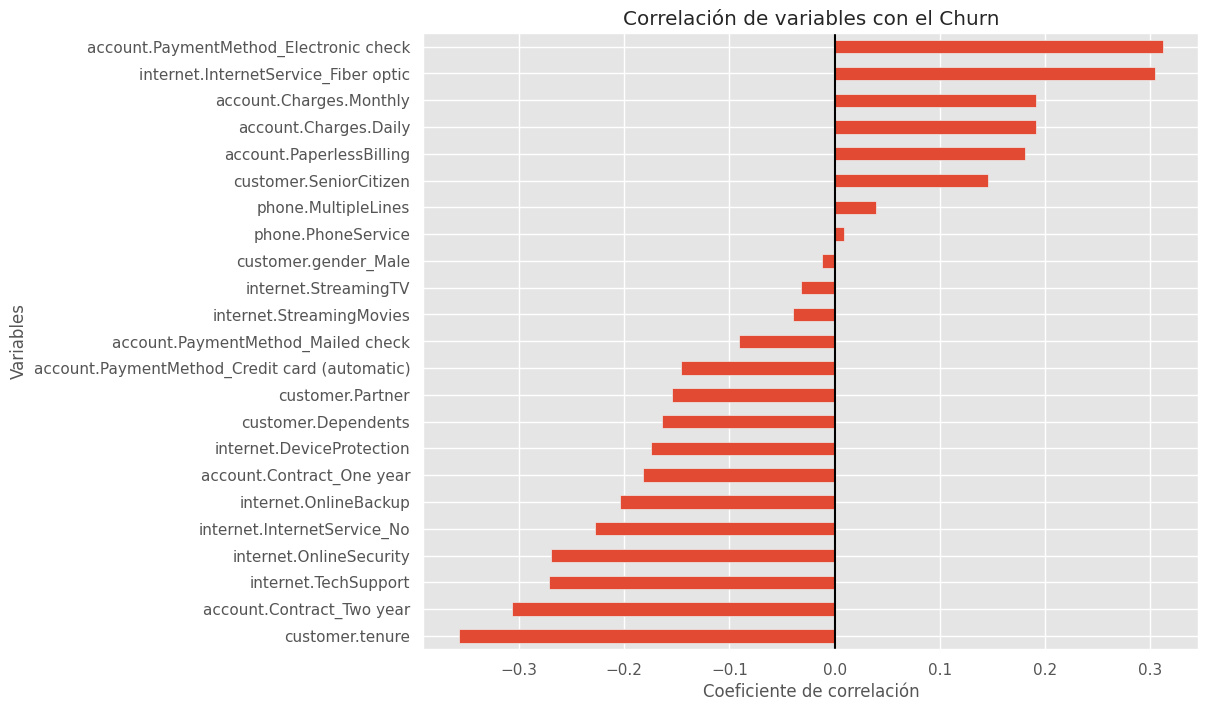

In [1138]:
plt.figure(figsize=(10,8))
corr_churn.plot(kind='barh')

plt.title("Correlación de variables con el Churn")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")

plt.axvline(0, color='black')
plt.show()

Este ranking muestra qué variables se asocian más con la cancelación. Las barras positivas indican factores que incrementan el riesgo —principalmente el método de pago electrónico, la fibra y cargos mensuales altos—, mientras que las negativas señalan factores protectores, como mayor antigüedad, contratos largos y la presencia de soporte técnico y seguridad online. Estas asociaciones orientan la selección e interpretación de los modelos predictivos.

## 📊 Análisis de relaciones estadísticas con la variable objetivo

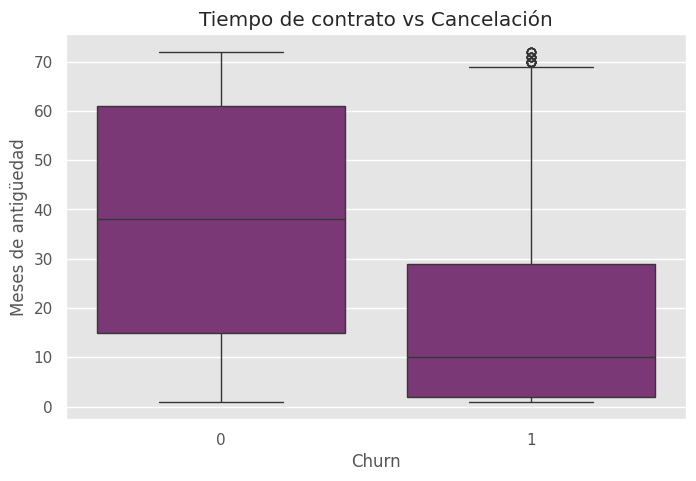

In [1139]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x='Churn',
    y='customer.tenure',
    data=df,
    color="#852E80"
)

plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn")
plt.ylabel("Meses de antigüedad")

plt.show()

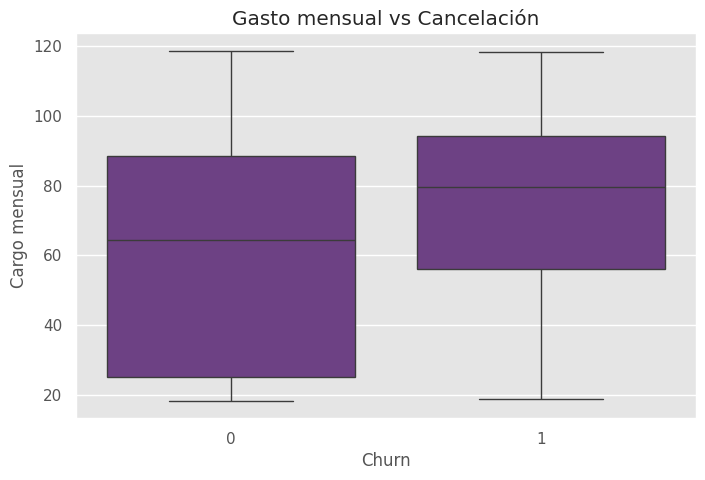

In [1140]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x='Churn',
    y='account.Charges.Monthly',
    data=df,
    color="#70368F"
    )

plt.title("Gasto mensual vs Cancelación")
plt.xlabel("Churn")
plt.ylabel("Cargo mensual")
plt.show()

Los boxplots evidencian que los clientes que cancelan presentan una antigüedad significativamente menor, concentrándose en los primeros meses de contrato. Asimismo, los clientes con mayores cargos mensuales muestran una tendencia más alta a la cancelación. Estos patrones refuerzan la relevancia de la permanencia y el costo como factores asociados al churn.

## ⚙️ Escalado de variables numéricas

In [1141]:
# Definir columnas numéricas continuas
columnas_numericas_continuas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Daily']


In [1142]:
# Crear el scaler
scaler = StandardScaler()

In [1143]:
# Ajustar SOLO con el train y transformar
X_train[columnas_numericas_continuas] = scaler.fit_transform(X_train[columnas_numericas_continuas])

In [1144]:
# Transformar el test con los parámetros aprendidos del train
X_test[columnas_numericas_continuas] = scaler.transform(X_test[columnas_numericas_continuas])

In [1145]:
# Verificación
X_train[columnas_numericas_continuas].describe().loc[['mean','std']]

,customer.tenure,account.Charges.Monthly,account.Charges.Daily
mean,-3.221127e-17,1.452665e-17,-7.642282e-17
std,1.000089e+00,1.000089e+00,1.000089e+00


## 🤖 Modelos predictivos

### 📈 Modelo 1 — Regresión Logística

In [1146]:
# Creacion del modelo
modelo_regresion_logistica = LogisticRegression(max_iter=5000, random_state=42)

In [1147]:
# Entrenar el modelo
modelo_regresion_logistica.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [1148]:
# Predicciones
y_pred_log = modelo_regresion_logistica.predict(X_test)

In [1149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [1150]:
# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Accuracy: 0.7960199004975125
Precision: 0.637223974763407
Recall: 0.5401069518716578
F1 Score: 0.5846599131693199


In [1151]:
# Reporte completo
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_log))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [1152]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_log)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[918 115]
 [172 202]]


El modelo presenta un buen desempeño general, alcanzando una exactitud cercana al 80%. Sin embargo, su capacidad para identificar clientes que cancelan es moderada, evidenciada por un recall del 54%.

Esto indica que, aunque el modelo logra reconocer patrones asociados a la cancelación, aún deja sin detectar una proporción considerable de clientes en riesgo.

En términos de negocio, el modelo puede funcionar como un sistema de alerta inicial, permitiendo anticipar parte de los casos de churn. No obstante, su sensibilidad todavía es limitada, por lo que resulta necesario evaluar modelos más complejos que capturen relaciones no lineales y mejoren la detección de clientes propensos a cancelar.

### 📊 Modelo 2 — Árbol de Decisión

In [1153]:
from sklearn.tree import DecisionTreeClassifier

In [1154]:
# Creación del modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

In [1155]:
# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1156]:
# Predicciones
y_pred_arbolito = modelo_arbol.predict(X_test)

In [1157]:
# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_arbolito))
print("Precision:", precision_score(y_test, y_pred_arbolito))
print("Recall:", recall_score(y_test, y_pred_arbolito))
print("F1 Score:", f1_score(y_test, y_pred_arbolito))

Accuracy: 0.7171286425017769
Precision: 0.46875
Recall: 0.48128342245989303
F1 Score: 0.47493403693931396


In [1158]:
# Reporte completo
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_arbolito))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.48      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [1159]:
# Matriz de confusion
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_arbolito))



Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.48      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



Se compararon dos enfoques predictivos. La regresión logística mostró mejor desempeño general, alcanzando mayor exactitud, recall y F1-score que el árbol de decisión.

Esto indica que las relaciones entre variables y churn son mayormente lineales y continuas, lo que favorece a modelos probabilísticos frente a modelos basados en reglas discretas.

### 📊 Modelo 3 — Random Forest

In [1160]:
# Creación del modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [1161]:
# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [1162]:
# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

In [1163]:
# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))



Accuracy: 0.7839374555792467
Precision: 0.624113475177305
Recall: 0.47058823529411764
F1 Score: 0.5365853658536586


In [1164]:
# Reporte completo
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_rf))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [1165]:
# Matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión:\n", cm_rf)

Matriz de confusión:
 [[927 106]
 [198 176]]


Se compararon tres modelos predictivos: Regresión Logística, Árbol de Decisión y Random Forest.

La Regresión Logística obtuvo el mejor desempeño general, especialmente en la detección de clientes que cancelan (mayor recall para la clase churn).

El Árbol de Decisión mostró el rendimiento más bajo, evidenciando menor capacidad de generalización.

El modelo Random Forest mejoró la estabilidad respecto al árbol simple, pero no superó a la regresión logística en la identificación de cancelaciones.

Dado que en problemas de churn es prioritario detectar clientes en riesgo de abandono, se considera que la Regresión Logística presenta el mejor equilibrio entre precisión y capacidad predictiva.

### 🧠 Evaluación de los modelos

In [1166]:
# Crear tabla comparativa de modelos

resultados = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Árbol de Decisión", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_arbolito),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_arbolito),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_arbolito),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_arbolito),
        f1_score(y_test, y_pred_rf)
    ]
})

resultados

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.796020,0.637224,0.540107,0.584660
1,Árbol de Decisión,0.717129,0.468750,0.481283,0.474934
2,Random Forest,0.783937,0.624113,0.470588,0.536585


El mejor modelo para predecir churn en este caso es la Regresión Logística, ya que presenta el mayor recall para la clase positiva, lo que permite identificar una mayor proporción de clientes en riesgo de cancelación, característica crítica en problemas de retención.

Sobre overfitting y underfitting: el árbol de decisión probablemente muestra señales de overfitting por su baja generalización. La Regresión Logística es el modelo más equilibrado. El Random Forest reduce el overfitting del árbol, pero sigue sacrificando recall.

### 🔎 Importancia de variables — Regresión Logística

In [1167]:
# Obtener coeficientes del modelo
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": modelo_regresion_logistica.coef_[0]
})

In [1168]:
# Ordenar por impacto
coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

coeficientes.head(10)

,Variable,Coeficiente
17,internet.InternetService_Fiber optic,0.801219
22,account.PaymentMethod_Electronic check,0.382272
12,account.PaperlessBilling,0.362150
5,phone.MultipleLines,0.295233
0,customer.SeniorCitizen,0.238668
10,internet.StreamingTV,0.196158
11,internet.StreamingMovies,0.191289
1,customer.Partner,0.021417
23,account.PaymentMethod_Mailed check,0.014120
8,internet.DeviceProtection,0.000990


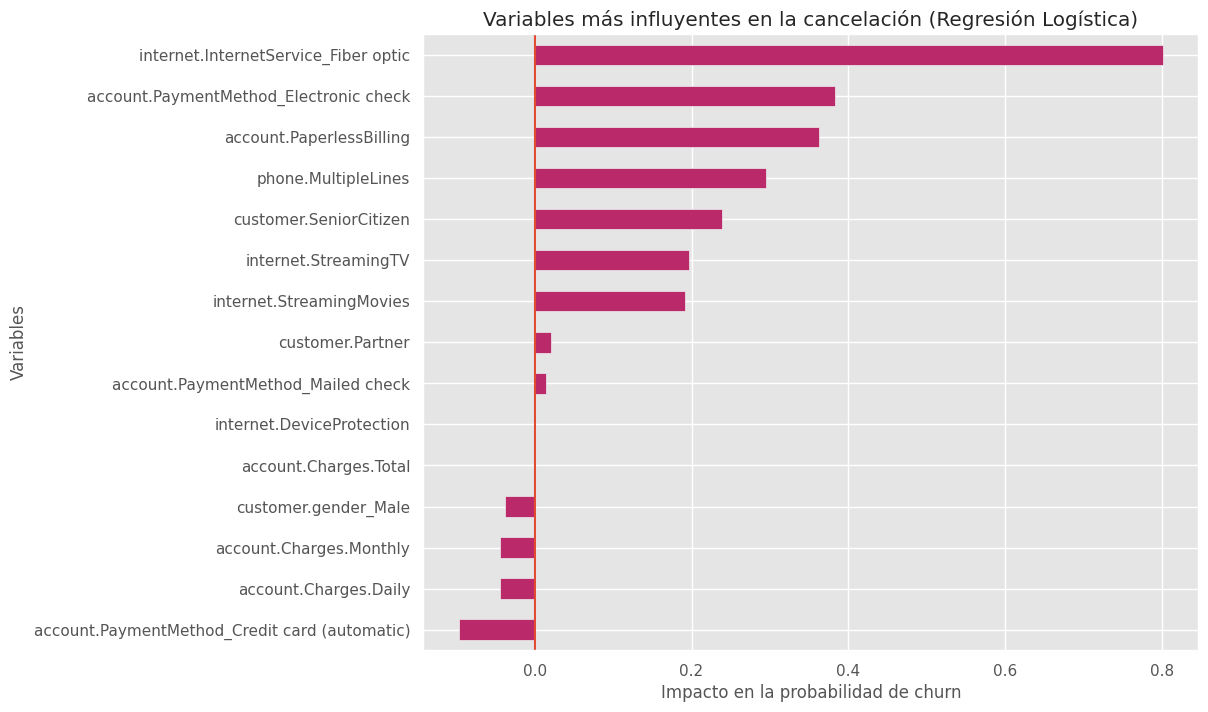

In [1169]:
plt.figure(figsize=(10,8))

coeficientes.set_index("Variable").head(15)["Coeficiente"] \
    .sort_values() \
    .plot(kind="barh", color="#BA296A")

plt.title("Variables más influyentes en la cancelación (Regresión Logística)")
plt.xlabel("Impacto en la probabilidad de churn")
plt.ylabel("Variables")

plt.axvline(0)  # línea de referencia
plt.show()

### 🌲 Importancia de variables — Random Forest

In [1170]:
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": modelo_rf.feature_importances_
})

importancias = importancias.sort_values(by="Importancia", ascending=False)

importancias.head(10)

,Variable,Importancia
14,account.Charges.Total,0.167231
3,customer.tenure,0.154092
13,account.Charges.Monthly,0.135371
15,account.Charges.Daily,0.134973
22,account.PaymentMethod_Electronic check,0.038455
17,internet.InternetService_Fiber optic,0.034817
20,account.Contract_Two year,0.034803
16,customer.gender_Male,0.024721
12,account.PaperlessBilling,0.024280
19,account.Contract_One year,0.023290


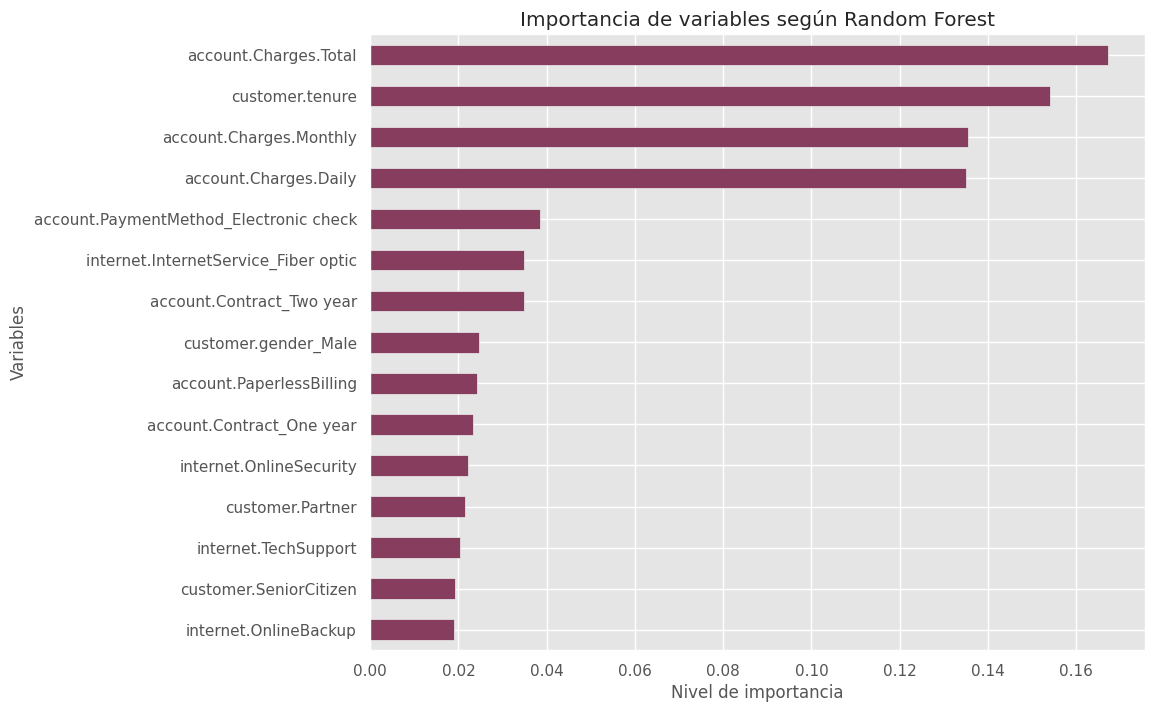

In [1171]:
plt.figure(figsize=(10,8))

importancias.set_index("Variable").head(15)["Importancia"] \
    .sort_values() \
    .plot(kind="barh", color="#873D5E")

plt.title("Importancia de variables según Random Forest")
plt.xlabel("Nivel de importancia")
plt.ylabel("Variables")

plt.show()

### 📋 Conclusión

### 1️⃣ Hallazgos principales

El análisis mostró que los clientes con menor antigüedad presentan una mayor probabilidad de cancelación, especialmente durante los primeros meses de contrato. Esto indica que el período inicial es crítico para la retención y que la experiencia temprana del cliente influye fuertemente en su permanencia.

También se observó que los contratos mensuales concentran la mayor tasa de cancelación en comparación con los contratos de mayor duración. Esto sugiere que los compromisos a largo plazo funcionan como un factor que reduce el churn.

Por otro lado, los clientes con cargos mensuales más elevados tienden a cancelar con mayor frecuencia, lo que evidencia que la percepción del costo del servicio impacta directamente en la decisión de continuar o no con la empresa.

Finalmente, la ausencia de servicios adicionales, como soporte técnico o seguridad online, se asocia con mayores niveles de cancelación, lo que refuerza la importancia del valor agregado en la fidelización de clientes.

### 2️⃣ Comparación de modelos

Se evaluaron tres modelos predictivos para estimar la cancelación de clientes: Regresión Logística, Árbol de Decisión y Random Forest. Cada uno presentó características distintas en su desempeño.

La Regresión Logística obtuvo el mejor equilibrio general entre las métricas, destacándose especialmente en el recall de la clase de cancelación. Esto significa que fue el modelo más eficaz para identificar clientes con riesgo de churn, lo cual resulta fundamental en problemas de retención.

El Árbol de Decisión mostró el desempeño más bajo, con menor capacidad de generalización. Esto sugiere posibles señales de sobreajuste, ya que el modelo tiende a adaptarse demasiado a los datos de entrenamiento y pierde precisión en datos nuevos.

Por su parte, Random Forest mejoró la estabilidad respecto al árbol individual, logrando mayor exactitud global y reduciendo el sobreajuste. Sin embargo, no superó a la Regresión Logística en la identificación de clientes que cancelan.

En conjunto, los resultados indican que la Regresión Logística es el modelo más adecuado para este problema, ya que prioriza correctamente la detección de clientes en riesgo, un aspecto crítico en estrategias de retención.

### 3️⃣ Interpretación de negocio

El análisis permitió identificar patrones claros asociados a la cancelación de clientes. El factor más determinante es la antigüedad: los clientes con menor tiempo en la empresa presentan una probabilidad significativamente mayor de abandonar el servicio. Esto indica que el período inicial de la relación con el cliente es crítico para su fidelización.

Otro elemento clave es el tipo de contrato. Los clientes con contratos mensuales muestran una tasa de cancelación mucho más alta que aquellos con contratos anuales o de largo plazo. Esto sugiere que la falta de compromiso contractual facilita la decisión de abandonar el servicio.

También se observa que los cargos mensuales elevados se asocian con un mayor riesgo de churn, lo que puede reflejar sensibilidad al precio o una percepción insuficiente del valor recibido. En este sentido, el método de pago mediante cheque electrónico aparece fuertemente vinculado a clientes con mayor probabilidad de cancelación, posiblemente indicando perfiles menos comprometidos o con menor automatización en sus pagos.

Por último, la ausencia de servicios adicionales como soporte técnico, seguridad online o protección de dispositivos está relacionada con mayores niveles de cancelación. Estos servicios parecen actuar como factores de retención, aumentando el valor percibido por el cliente.

En términos estratégicos, los resultados sugieren que las acciones de retención deberían enfocarse principalmente en clientes nuevos, usuarios con contratos mensuales y aquellos que no cuentan con servicios complementarios, ya que constituyen el segmento con mayor riesgo de cancelación.

### 4️⃣ Conclusión final

El análisis permitió identificar patrones claros asociados a la cancelación y validar modelos predictivos capaces de anticipar el churn. La regresión logística mostró el mejor equilibrio para detectar clientes en riesgo, mientras que Random Forest aportó robustez en la clasificación general. Estos resultados permiten diseñar estrategias de retención enfocadas en clientes nuevos, contratos flexibles y servicios de valor agregado.